# import required modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# import data from .mat file

In [2]:
from scipy.io import loadmat
mat = loadmat("ex6data1.mat")
X = mat["X"]
y = mat["y"]

Text(0.5, 1.0, 'how the data is disribtued')

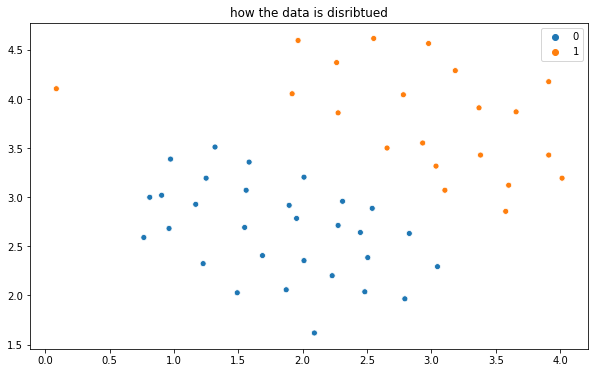

In [3]:
plt.figure(figsize=(10,6))
sns.scatterplot(X[:,0],X[:,1],hue=y[:,0])
plt.title("how the data is disribtued")

In [4]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [5]:
np.ravel(y)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1], dtype=uint8)

## support vector classifier using linear kernel method

In [6]:
from sklearn.svm import SVC
model = SVC(kernel="linear")
model.fit(x_train,np.ravel(y_train))

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Text(0.5, 1.0, 'how the svc learn the things using linear kernel')

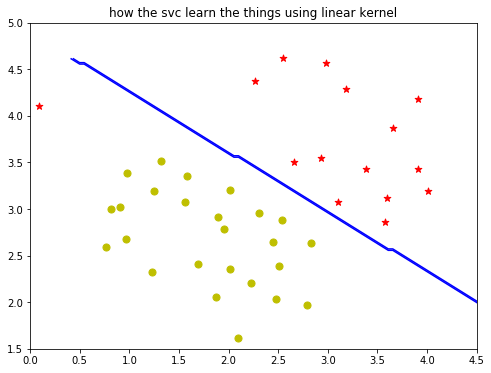

In [7]:
m,n = x_train.shape[0],x_train.shape[1]
positive = (y_train==1).reshape(m,1)
negative = (y_train==0).reshape(m,1)
plt.figure(figsize=(8,6))
plt.scatter(x_train[positive[:,0],0],x_train[positive[:,0],1],c="r",marker="*",s=50)
plt.scatter(x_train[negative[:,0],0],x_train[negative[:,0],1],c="y",marker="o",s=50)
# plotting the decision  by taking minmum and maximum values from frist column and second column in the x data
X_1,X_2 = np.meshgrid(np.linspace(x_train[:,0].min(),x_train[:,1].max(),num=100),np.linspace(x_train[:,1].min(),
                                                                                             x_train[:,1].max(),num=100))
plt.contour(X_1,X_2,model.predict(np.array([X_1.ravel(),X_2.ravel()]).T).reshape(X_1.shape),1,colors="b")
plt.xlim(0,4.5)
plt.ylim(1.5,5)
plt.title("how the svc learn the things using linear kernel")

In [8]:
y_predict=model.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix
print('accuracy_score :',accuracy_score(y_test,y_predict))

accuracy_score : 1.0


Text(0.5, 1, 'Confusion_matrix')

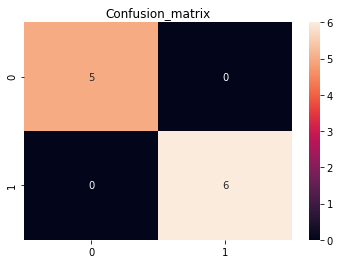

In [9]:
c=confusion_matrix(y_test,y_predict)
sns.heatmap(c,annot=True,fmt='d')
plt.title("Confusion_matrix")

### working on unstructured data using rbf kernel method in svc

## import matfile data 

Text(0.5, 1.0, 'svc using rbf kernel method')

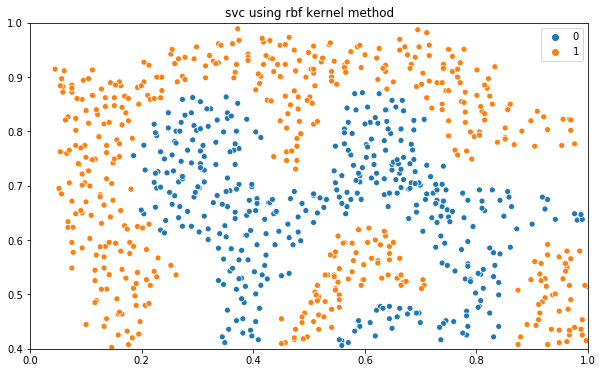

In [10]:
df2 = loadmat("ex6data2.mat")
X2 = df2["X"]
y2 = df2["y"]
m2,n2 = X2.shape[0],X2.shape[1]
plt.figure(figsize=(10,6))
sns.scatterplot(X2[:,0],X2[:,1],hue=y2[:,0],markers=True)
plt.xlim(0,1)
plt.ylim(0.4,1)
plt.title("svc using rbf kernel method")

In [11]:
from sklearn.model_selection import train_test_split
x2_train,x2_test,y2_train,y2_test=train_test_split(X2,y2,test_size=0.2)

In [12]:
positive2 = (y2_train==1).reshape(x2_train.shape[0],1)
negative2 = (y2_train==0).reshape(x2_train.shape[0],1)

## import support vector classifier using rbf kernel method

In [13]:
from sklearn.svm import SVC
model2 = SVC(kernel="rbf",gamma=30)
model2.fit(x2_train,y2_train.ravel())

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=30, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Text(0.5, 1.0, 'svc using rbf kernel')

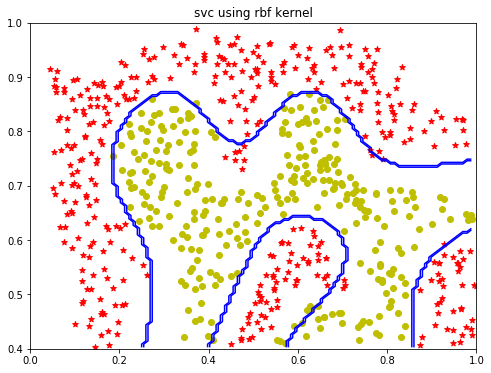

In [15]:
plt.figure(figsize=(8,6))
plt.scatter(x2_train[positive2[:,0],0],x2_train[positive2[:,0],1],c="r",marker="*")
plt.scatter(x2_train[negative2[:,0],0],x2_train[negative2[:,0],1],c="y",marker="o")
# plotting the decision boundary using rbf kernel method
X_5,X_6 = np.meshgrid(np.linspace(x2_train[:,0].min(),x2_train[:,1].max(),num=100),
                      np.linspace(x2_train[:,1].min(),x2_train[:,1].max(),num=100))
plt.contour(X_5,X_6,model2.predict(np.array([X_5.ravel(),X_6.ravel()]).T).reshape(X_6.shape),1,colors="b")
plt.xlim(0,1)
plt.ylim(0.4,1)
plt.title("svc using rbf kernel")

In [16]:
y2_predict=model2.predict(x2_test)

In [17]:
from sklearn.metrics import accuracy_score,confusion_matrix
print("accuracy_score : ",accuracy_score(y2_test,y2_predict))

accuracy_score :  0.9421965317919075


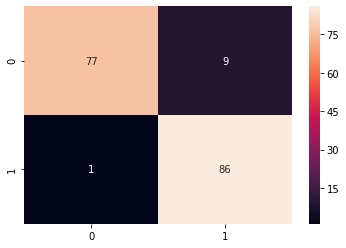

In [18]:
c2=confusion_matrix(y2_test,y2_predict)
sns.heatmap(c2,annot=True,fmt='d')